In [1]:
# !pip install openpyxl==3.1

In [2]:
import pandas as pd 
import numpy as np 
import math

c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [70]:
def returns(P1, P2):
    R = ((P2-P1)/P1)
    return R

In [4]:
def logreturns(P1, P2):
    R = math.log(P2/P1)
    return R

In [5]:
def logreturns_dividends(P1, P2, D):
    R = math.log((P2+D)/P1)
    return R

In [6]:
def total_return_index(Ri1, P1, P2, D):
    Ri2 = Ri1*((P2+D)/P1)
    return Ri2

In [7]:
Pdata = pd.read_excel("DSB2_copy.xlsx", sheet_name="P#S")
# Pdata

In [8]:
static_data = pd.read_excel("DSB2_copy.xlsx", sheet_name="static")
# static_data

In [9]:
VOdata = pd.read_excel("DSB2_copy.xlsx", sheet_name="VO")
# VOdata

In [10]:
RIdata = pd.read_excel("DSB2_copy.xlsx", sheet_name="RI")
# RIdata

In [11]:
ESGdata = pd.read_excel("DSB2_Eikon_copy.xlsx", sheet_name="ESG")
ESGdata = ESGdata.rename(columns={"Unnamed: 0": "ISIN CODE"})
ESGdata

,ISIN CODE,ESG Score,Date,Financial Period Absolute
0,US30231G1022,80.252709,2009-12-31,FY2009
1,US30231G1022,85.638177,2010-12-31,FY2010
2,US30231G1022,85.460643,2011-12-31,FY2011
3,US30231G1022,82.231685,2012-12-31,FY2012
4,US30231G1022,80.417936,2013-12-31,FY2013
...,...,...,...,...
2336,JP3955800002,62.790439,2017-12-31,FY2017
2337,JP3955800002,64.336139,2018-12-31,FY2018
2338,JP3955800002,62.256024,2019-12-31,FY2019
2339,CA98936C8584,NaN,NaT,NaN


In [12]:
Eikon_data = pd.read_excel("DSB2_Eikon_copy.xlsx", sheet_name="Tabelle3")
Eikon_data = Eikon_data.drop(columns=["Unnamed: 0", "Unnamed: 2"])
Eikon_data

,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,2022-06-30 00:00:00,2022-09-30 00:00:00,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00
0,Company Common Name,TRBC Industry Name,ISIN,RIC,Price Close,Price Close,Price Close,Price Close,Price Close,Price Close,Price Close,Price Close,Price Close,Price Close
1,CIR SpA - Compagnie Industriali Riunite,"Auto, Truck & Motorcycle Parts",IT0000070786,CIRI.MI,0.422423,0.386571,0.465004,0.417845,0.412944,0.42703,0.475097,0.578184,0.63742,0.637978
2,Stellantis NV,Auto & Truck Manufacturers,NL00150001Q9,STLAM.MI,12.360328,12.02536,14.195205,18.140236,17.554195,19.248047,23.341022,28.418407,19.786812,13.815064
3,Pininfarina SpA,Auto & Truck Manufacturers,IT0003056386,PNNI.MI,0.844846,0.830957,0.896832,0.89097,0.920804,0.866743,0.87184,0.837073,0.812041,0.837277
4,Exco Technologies Ltd,"Auto, Truck & Motorcycle Parts",CA30150P1099,XTC.TO,6.207272,5.569217,5.683076,5.660377,6.029012,5.47249,5.949415,5.480869,5.812678,5.908015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,Schaeffler AG,"Auto, Truck & Motorcycle Parts",DE000SHA0019,SHA0.DE,5.660259,4.534987,6.811858,7.603594,6.158697,5.765958,6.174611,6.741888,5.758209,5.159495
1322,NaN,NaN,DE000SHA0019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1323,Wellysun Inc,"Auto, Truck & Motorcycle Parts",TW0006988009,6988.TW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1324,SAG Holdings Ltd,"Auto, Truck & Motorcycle Parts",KYG7776G1047,SAG.OQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
isin_code = ['Date']
for code in static_data["ISIN CODE"]:
    isin_code.append(code)

In [14]:
# isin_code

In [15]:
Pdata.columns = isin_code

In [16]:
dates = []
for date in Pdata["Date"]:
    dates.append(date)

In [17]:
Pdata_transposed = Pdata.transpose()
# Pdata_transposed

In [18]:
Pdata_transposed.columns = dates
Pdata_transposed.drop(index=Pdata_transposed.index[0], axis=0, inplace=True)
# Pdata_transposed

In [19]:
VOdata.columns = isin_code
VOdata_transposed = VOdata.transpose()
VOdata_transposed.columns = dates
VOdata_transposed.drop(index=VOdata_transposed.index[0], axis=0, inplace=True)
# VOdata_transposed

In [20]:
RIdata.columns = isin_code
RIdata_transposed = RIdata.transpose()
RIdata_transposed.columns = dates
RIdata_transposed.drop(index=RIdata_transposed.index[0], axis=0, inplace=True)
# RIdata_transposed

In [21]:
Pdata_merge = Pdata_transposed.copy()
Pdata_merge['datatype']="P#S"
# Pdata_merge

In [22]:
datatype_col = Pdata_merge.pop('datatype')
Pdata_merge.insert(0, 'datatype', datatype_col)
# Pdata_merge

In [23]:
def drop_dupli(df):
    dupli = []

    for idx in df.index:
        if idx in dupli:
            df = df.drop(index=idx)
        else:
            dupli.append(idx)
            
    return df

In [24]:
Pdata_merge = drop_dupli(Pdata_merge)

In [25]:
Pdata_merge.describe()

,datatype,2010-01-01 00:00:00,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,...,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2024-01-01 00:00:00
count,218,0,181.00,182.00,182.00,182.00,182.00,181.00,171.00,181.00,...,210.00,210.0,210.0,210.0,0,12.0000,209.0,209.0,209.0,0
unique,1,0,165.00,166.00,162.00,160.00,160.00,161.00,154.00,166.00,...,165.00,162.0,163.0,166.0,0,12.0000,165.0,164.0,164.0,0
top,P#S,NaN,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.0,0.0,0.0,NaN,546.1699,0.0,0.0,0.0,NaN
freq,218,NaN,5.00,5.00,5.00,5.00,4.00,4.00,4.00,5.00,...,11.00,10.0,10.0,10.0,NaN,1.0000,10.0,9.0,9.0,NaN


In [26]:
columns_to_drop = Pdata_merge.columns[Pdata_merge.isna().all()]
columns_to_drop

Index([2010-01-01 00:00:00, 2010-04-02 00:00:00, 2010-12-24 00:00:00,
       2011-04-22 00:00:00, 2011-12-26 00:00:00, 2012-04-06 00:00:00,
       2012-12-25 00:00:00, 2013-01-01 00:00:00, 2013-03-29 00:00:00,
       2013-12-25 00:00:00, 2014-01-01 00:00:00, 2014-04-18 00:00:00,
       2014-12-25 00:00:00, 2015-01-01 00:00:00, 2015-04-03 00:00:00,
       2015-12-25 00:00:00, 2016-01-01 00:00:00, 2016-03-25 00:00:00,
       2016-12-26 00:00:00, 2017-04-14 00:00:00, 2017-12-25 00:00:00,
       2018-01-01 00:00:00, 2018-03-30 00:00:00, 2018-12-25 00:00:00,
       2019-01-01 00:00:00, 2019-04-19 00:00:00, 2019-12-25 00:00:00,
       2020-01-01 00:00:00, 2020-04-10 00:00:00, 2020-12-25 00:00:00,
       2021-01-01 00:00:00, 2021-04-02 00:00:00, 2021-12-24 00:00:00,
       2022-04-15 00:00:00, 2022-12-26 00:00:00, 2023-04-07 00:00:00,
       2023-12-25 00:00:00, 2024-01-01 00:00:00],
      dtype='object')

In [27]:
VOdata_merge = VOdata_transposed.copy()
VOdata_merge['datatype']="VO"
datatype_col = VOdata_merge.pop('datatype')
VOdata_merge.insert(0, 'datatype', datatype_col)
VOdata_merge = drop_dupli(VOdata_merge)
VOdata_merge

,datatype,2010-01-01 00:00:00,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,...,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2024-01-01 00:00:00
DE0005190003,VO,NaN,10.19,10.26,7.311999,4.058999,7.212,7.226,22.51599,10.958,...,3.512,1.256,0.806,1.43,NaN,NaN,0.554,0.339,0.297,NaN
DE0007100000,VO,NaN,46.40201,25.71188,20.81786,43.52574,38.24725,48.94751,65.26176,32.77893,...,5.496,7.208,13.444,2.58,NaN,NaN,8.513,5.321,7.407,NaN
DE0007664005,VO,NaN,13.51851,4.412872,3.487608,4.888089,3.694005,5.335114,5.144827,2.618727,...,0.7,0.18,0.306,0.109,NaN,NaN,0.581,0.206,0.118,NaN
US88262P1021,VO,NaN,95.18997,66.98697,54.55795,18.60898,32.33998,63.46498,154.7429,19.15799,...,85.95898,79.269,83.21098,47.21999,NaN,37.46399,33.41699,48.08096,69.48297,NaN
DE0005439004,VO,NaN,5.727517,11.15827,7.315289,27.39391,10.36265,21.02322,17.72688,10.3474,...,0.278,0.13,0.997,0.106,NaN,NaN,0.06,0.229,0.126,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,VO,NaN,0.530972,0.749845,NaN,0.303991,0.121596,NaN,0.10133,0.10133,...,0.939,5.006,1.781,1.581,NaN,NaN,2.571,1.348,0.383,NaN
CA98474P5013,VO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JP3955800002,VO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA98936C8584,VO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
RIdata_merge = RIdata_transposed.copy()
RIdata_merge['datatype']="RI"
datatype_col = RIdata_merge.pop('datatype')
RIdata_merge.insert(0, 'datatype', datatype_col)
RIdata_merge = drop_dupli(RIdata_merge)
RIdata_merge

,datatype,2010-01-01 00:00:00,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,...,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2024-01-01 00:00:00
DE0005190003,RI,5036.18,5044.05,5089.7,5161.3,5208.52,5149.5,5075.53,4902.41,4963.79,...,27947.05,27623.43,27474.07,27758.96,27758.96,27758.96,27736.84,27841.95,27880.67,27880.67
DE0007100000,RI,79.92,80.64,80.19,79.92,79.19,79.21,79.89,77.35,77.99,...,299.31,296.22,296.7,298.97,298.97,298.97,298.21,294.89,296.98,296.98
DE0007664005,RI,2730.19,2622.17,2663.17,2666.73,2688.13,2728.41,2700.96,2635.0,2654.26,...,7006.26,7031.89,6858.16,6852.46,6852.46,6852.46,6789.8,6684.43,6681.58,6681.58
US88262P1021,RI,6763.68,6556.6,6926.86,6752.42,6696.15,6527.34,6509.34,6471.07,6570.11,...,413758.8,410280.6,411381.5,410817.1,410817.1,416591.1,416214.8,406321.9,399795.3,399795.3
DE0005439004,RI,1410.94,1446.35,1546.06,1555.69,1770.89,1810.16,1695.43,1622.52,1693.48,...,4354.39,4375.09,4364.74,4388.89,4388.89,4388.89,4358.99,4394.64,4428.0,4428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,RI,665.34,696.37,702.76,696.48,707.66,701.62,710.06,706.87,706.98,...,894.21,905.53,896.1,908.36,908.36,908.36,897.04,885.72,894.21,894.21
CA98474P5013,RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.33,56.33,56.67,56.33,56.33,56.33,57.0,58.33,58.0,58.0
JP3955800002,RI,151.57,150.51,149.16,150.26,142.68,141.38,140.93,143.54,142.73,...,740.83,763.28,755.79,763.28,763.28,763.28,763.28,775.23,782.83,782.83
CA98936C8584,RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.22,0.25,0.25,0.24,0.24,0.24,0.25,0.25,0.23,0.23


In [29]:
combined_df = pd.concat([Pdata_merge, VOdata_merge, RIdata_merge], ignore_index=False)
combined_df

,datatype,2010-01-01 00:00:00,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,...,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2024-01-01 00:00:00
DE0005190003,P#S,NaN,32.05,32.34,32.795,33.095,32.72,32.25,31.15,31.54,...,101.04,99.87,99.33,100.36,NaN,NaN,100.28,100.66,100.8,NaN
DE0007100000,P#S,NaN,31.412,31.236,31.132,30.847,30.855,31.119,30.131,30.382,...,63.09,62.44,62.54,63.02,NaN,NaN,62.86,62.16,62.6,NaN
DE0007664005,P#S,NaN,73.052,74.194,74.294,74.89,76.012,75.247,73.41,73.946,...,123.0,123.45,120.4,120.3,NaN,NaN,119.2,117.35,117.3,NaN
US88262P1021,P#S,NaN,9.71,10.2583,10.0,9.9167,9.6667,9.64,9.5833,9.73,...,542.4565,537.8965,539.3398,538.5999,NaN,546.1699,545.6765,532.7065,524.1499,NaN
DE0005439004,P#S,NaN,32.535,34.778,34.995,39.836,40.719,38.138,36.498,38.094,...,75.72,76.08,75.9,76.32,NaN,NaN,75.8,76.42,77.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,RI,665.34,696.37,702.76,696.48,707.66,701.62,710.06,706.87,706.98,...,894.21,905.53,896.1,908.36,908.36,908.36,897.04,885.72,894.21,894.21
CA98474P5013,RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.33,56.33,56.67,56.33,56.33,56.33,57.0,58.33,58.0,58.0
JP3955800002,RI,151.57,150.51,149.16,150.26,142.68,141.38,140.93,143.54,142.73,...,740.83,763.28,755.79,763.28,763.28,763.28,763.28,775.23,782.83,782.83
CA98936C8584,RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.22,0.25,0.25,0.24,0.24,0.24,0.25,0.25,0.23,0.23


In [30]:
combined_df_cleaned = combined_df.copy()
combined_df_cleaned = combined_df_cleaned.drop(columns=columns_to_drop)
combined_df_cleaned

,datatype,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,2010-01-14 00:00:00,...,2023-12-15 00:00:00,2023-12-18 00:00:00,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00
DE0005190003,P#S,32.05,32.34,32.795,33.095,32.72,32.25,31.15,31.54,31.83,...,102.72,101.5,101.04,99.87,99.33,100.36,NaN,100.28,100.66,100.8
DE0007100000,P#S,31.412,31.236,31.132,30.847,30.855,31.119,30.131,30.382,30.989,...,64.5,63.72,63.09,62.44,62.54,63.02,NaN,62.86,62.16,62.6
DE0007664005,P#S,73.052,74.194,74.294,74.89,76.012,75.247,73.41,73.946,73.032,...,124.0,123.15,123.0,123.45,120.4,120.3,NaN,119.2,117.35,117.3
US88262P1021,P#S,9.71,10.2583,10.0,9.9167,9.6667,9.64,9.5833,9.73,9.3333,...,532.4099,534.1233,542.4565,537.8965,539.3398,538.5999,546.1699,545.6765,532.7065,524.1499
DE0005439004,P#S,32.535,34.778,34.995,39.836,40.719,38.138,36.498,38.094,37.406,...,76.4,75.76,75.72,76.08,75.9,76.32,NaN,75.8,76.42,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,RI,696.37,702.76,696.48,707.66,701.62,710.06,706.87,706.98,711.54,...,880.06,884.78,894.21,905.53,896.1,908.36,908.36,897.04,885.72,894.21
CA98474P5013,RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.0,54.67,55.33,56.33,56.67,56.33,56.33,57.0,58.33,58.0
JP3955800002,RI,150.51,149.16,150.26,142.68,141.38,140.93,143.54,142.73,142.63,...,755.79,755.79,740.83,763.28,755.79,763.28,763.28,763.28,775.23,782.83
CA98936C8584,RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.22,0.23,0.22,0.25,0.25,0.24,0.24,0.25,0.25,0.23


In [31]:
combined_df_cleaned.to_csv('P_VO_RI.csv')
ESGdata.to_csv('esg_data.csv')
Eikon_data.to_csv('Eikon_data.csv')

c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7834: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


Plot Time Series

In [32]:
import matplotlib.pyplot as plt 

In [33]:
df = combined_df_cleaned.copy()

In [34]:
df_grouped = df.groupby('datatype').mean()

In [35]:
df_grouped

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29
datatype,,,,,,,,,,,,,,,,,,,,,
P#S,72.322938,74.975316,74.43249,79.486862,78.768152,81.867299,83.984893,78.041728,79.740899,79.51226,...,15.088204,15.086249,15.124998,15.131474,15.080499,15.126862,64.650825,15.281859,15.135084,15.107399
RI,500.91587,507.115163,509.484239,513.819022,515.829457,517.022826,513.182772,511.214348,506.395054,502.50788,...,2703.286147,2709.114174,2737.774908,2718.587339,2720.674495,2719.811101,2747.83789,2750.826972,2701.763257,2671.648073
VO,46.047094,74.43744,34.105975,48.689559,35.491361,56.464168,33.29085,31.731694,27.193212,48.768606,...,137.040587,65.995093,76.789192,52.133242,51.628184,65.795973,267.267751,48.19801,53.309995,68.708188


In [36]:
df_gr_transposed = df_grouped.transpose()
df_gr_transposed

datatype,P#S,RI,VO
2010-01-04 00:00:00,72.322938,500.91587,46.047094
2010-01-05 00:00:00,74.975316,507.115163,74.43744
2010-01-06 00:00:00,74.43249,509.484239,34.105975
2010-01-07 00:00:00,79.486862,513.819022,48.689559
2010-01-08 00:00:00,78.768152,515.829457,35.491361
...,...,...,...
2023-12-22 00:00:00,15.126862,2719.811101,65.795973
2023-12-26 00:00:00,64.650825,2747.83789,267.267751
2023-12-27 00:00:00,15.281859,2750.826972,48.19801
2023-12-28 00:00:00,15.135084,2701.763257,53.309995


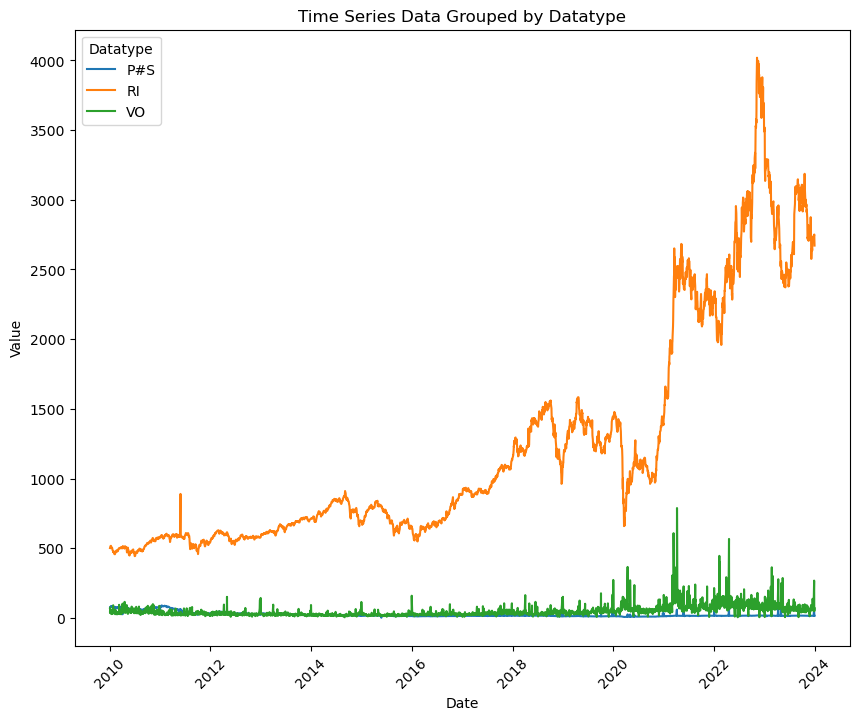

In [37]:
plt.figure(figsize=(10,8))

plt.plot(df_gr_transposed.index, df_gr_transposed.values, label = [data for data in df_gr_transposed])

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data Grouped by Datatype')
plt.xticks(rotation=45)
plt.legend(title='Datatype')
plt.show()

In [38]:
def plot_lineplot(row):
    plt.figure(figsize=(10,5))

    plt.plot(df_gr_transposed[row], label = row)

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Time Series Data Grouped by Datatype {row}')
    plt.xticks(rotation=45)
    plt.legend(title='Datatype')
    plt.grid(axis='y')
    plt.show()

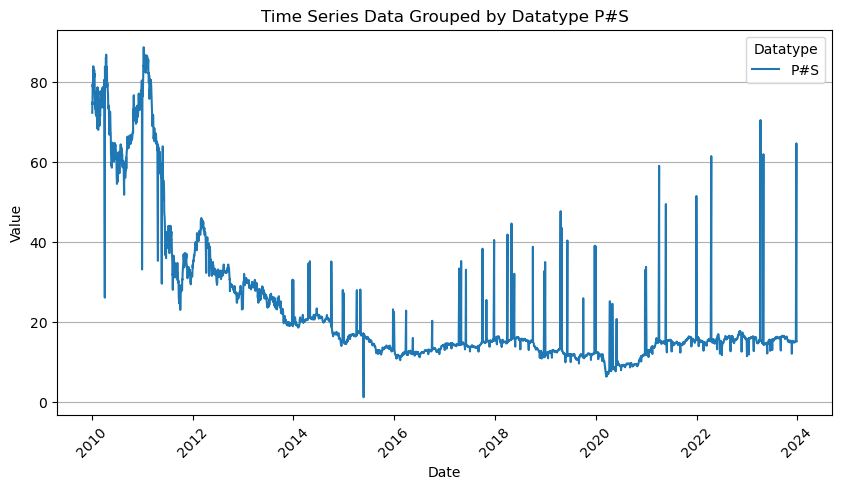

In [39]:
plot_lineplot('P#S')

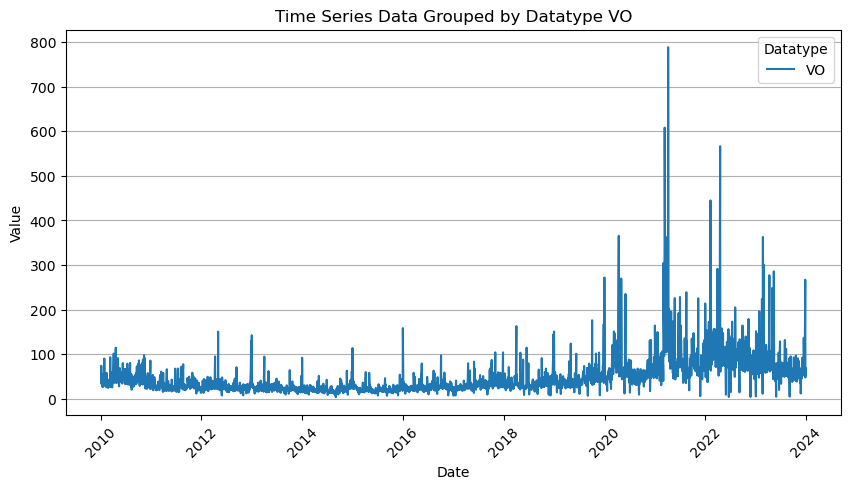

In [40]:
plot_lineplot('VO')

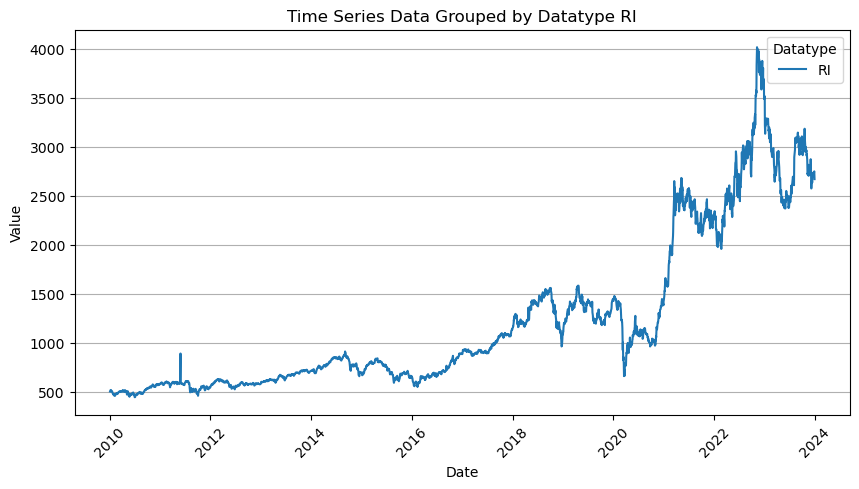

In [41]:
plot_lineplot('RI')

Calculate Returns


In [42]:
Pdata_merge

,datatype,2010-01-01 00:00:00,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,...,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2024-01-01 00:00:00
DE0005190003,P#S,NaN,32.05,32.34,32.795,33.095,32.72,32.25,31.15,31.54,...,101.04,99.87,99.33,100.36,NaN,NaN,100.28,100.66,100.8,NaN
DE0007100000,P#S,NaN,31.412,31.236,31.132,30.847,30.855,31.119,30.131,30.382,...,63.09,62.44,62.54,63.02,NaN,NaN,62.86,62.16,62.6,NaN
DE0007664005,P#S,NaN,73.052,74.194,74.294,74.89,76.012,75.247,73.41,73.946,...,123.0,123.45,120.4,120.3,NaN,NaN,119.2,117.35,117.3,NaN
US88262P1021,P#S,NaN,9.71,10.2583,10.0,9.9167,9.6667,9.64,9.5833,9.73,...,542.4565,537.8965,539.3398,538.5999,NaN,546.1699,545.6765,532.7065,524.1499,NaN
DE0005439004,P#S,NaN,32.535,34.778,34.995,39.836,40.719,38.138,36.498,38.094,...,75.72,76.08,75.9,76.32,NaN,NaN,75.8,76.42,77.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,P#S,NaN,30.12,30.4,30.12,30.61,30.35,30.71,30.57,30.58,...,18.96,19.2,19.0,19.26,NaN,NaN,19.02,18.78,18.96,NaN
CA98474P5013,P#S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.83,0.85,0.85,0.85,NaN,NaN,0.86,0.88,0.87,NaN
JP3955800002,P#S,NaN,6.0,5.94,5.99,5.69,5.63,5.62,5.72,5.69,...,19.8,20.4,20.2,20.4,NaN,NaN,20.4,20.4,20.6,NaN
CA98936C8584,P#S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.03,0.03,0.03,NaN,NaN,0.03,0.03,0.03,NaN


In [43]:
df_ret = Pdata_merge.copy()
df_ret = df_ret.drop(columns=columns_to_drop)
df_ret = df_ret.drop(columns=['datatype'])
df_ret

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29
DE0005190003,32.05,32.34,32.795,33.095,32.72,32.25,31.15,31.54,31.83,31.61,...,102.72,101.5,101.04,99.87,99.33,100.36,NaN,100.28,100.66,100.8
DE0007100000,31.412,31.236,31.132,30.847,30.855,31.119,30.131,30.382,30.989,30.587,...,64.5,63.72,63.09,62.44,62.54,63.02,NaN,62.86,62.16,62.6
DE0007664005,73.052,74.194,74.294,74.89,76.012,75.247,73.41,73.946,73.032,72.397,...,124.0,123.15,123.0,123.45,120.4,120.3,NaN,119.2,117.35,117.3
US88262P1021,9.71,10.2583,10.0,9.9167,9.6667,9.64,9.5833,9.73,9.3333,9.29,...,532.4099,534.1233,542.4565,537.8965,539.3398,538.5999,546.1699,545.6765,532.7065,524.1499
DE0005439004,32.535,34.778,34.995,39.836,40.719,38.138,36.498,38.094,37.406,36.664,...,76.4,75.76,75.72,76.08,75.9,76.32,NaN,75.8,76.42,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,30.12,30.4,30.12,30.61,30.35,30.71,30.57,30.58,30.78,29.92,...,18.66,18.76,18.96,19.2,19.0,19.26,NaN,19.02,18.78,18.96
CA98474P5013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.81,0.82,0.83,0.85,0.85,0.85,NaN,0.86,0.88,0.87
JP3955800002,6.0,5.94,5.99,5.69,5.63,5.62,5.72,5.69,5.68,5.72,...,20.2,20.2,19.8,20.4,20.2,20.4,NaN,20.4,20.4,20.6
CA98936C8584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.02,0.02,0.03,0.03,0.03,NaN,0.03,0.03,0.03


In [44]:
df_ret_transposed = df_ret.transpose()

In [45]:
df_ret_transposed

,DE0005190003,DE0007100000,DE0007664005,US88262P1021,DE0005439004,DE000A0XYG76,DE0007856023,US21676P1030,US22757R1095,DE0005146807,...,FR0013176526,CA9191444020,CA9237251058,US92839U2069,CA96467A2002,AU0000224040,CA98474P5013,JP3955800002,CA98936C8584,GB00BF44KY60
2010-01-04 00:00:00,32.05,31.412,73.052,9.71,32.535,NaN,17.17,NaN,34.58,29.165,...,8.47,NaN,31.5016,NaN,NaN,30.12,NaN,6.0,NaN,4.1
2010-01-05 00:00:00,32.34,31.236,74.194,10.2583,34.778,NaN,16.71,NaN,34.38,28.767,...,8.82,NaN,31.2701,NaN,NaN,30.4,NaN,5.94,NaN,4.0
2010-01-06 00:00:00,32.795,31.132,74.294,10.0,34.995,NaN,17.07,NaN,34.65,28.767,...,8.71,NaN,32.57,NaN,NaN,30.12,NaN,5.99,NaN,3.9
2010-01-07 00:00:00,33.095,30.847,74.89,9.9167,39.836,NaN,17.15,NaN,34.56,28.916,...,8.95,NaN,32.5871,NaN,NaN,30.61,NaN,5.69,NaN,3.9
2010-01-08 00:00:00,32.72,30.855,76.012,9.6667,40.719,NaN,17.25,NaN,34.67,29.852,...,9.02,NaN,32.953,NaN,NaN,30.35,NaN,5.63,NaN,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00,100.36,63.02,120.3,538.5999,76.32,33.2,5.525,18.7,18.33,2.11,...,13.9,1.96,12.52,116.0,6.14,19.26,0.85,20.4,0.03,0.02
2023-12-26 00:00:00,NaN,NaN,NaN,546.1699,NaN,NaN,NaN,20.06,18.27,NaN,...,NaN,NaN,12.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-27 00:00:00,100.28,62.86,119.2,545.6765,75.8,33.15,5.6,20.38,18.19,2.02,...,13.79,2.04,12.46,116.0,6.07,19.02,0.86,20.4,0.03,0.02
2023-12-28 00:00:00,100.66,62.16,117.35,532.7065,76.42,32.35,5.66,20.17,17.79,1.905,...,13.91,1.91,12.15,115.0,5.99,18.78,0.88,20.4,0.03,0.02


In [46]:
df_dates = df_ret_transposed.copy()
dates = pd.to_datetime(df_dates.index, errors='coerce')
# dates

In [47]:
df_dates['Date'] = dates
# df_dates

In [48]:
df_dates = df_dates.set_index('Date')
# df_dates

In [49]:
df_dates = df_dates.loc[~df_dates.index.duplicated(keep='first')]

In [50]:
df_dates = df_dates.groupby(df_dates.index).first()

In [69]:
df_dates.to_csv('Pdata_dates.csv')
df_dates.head()

,DE0005190003,DE0007100000,DE0007664005,US88262P1021,DE0005439004,DE000A0XYG76,DE0007856023,US21676P1030,US22757R1095,DE0005146807,...,FR0013176526,CA9191444020,CA9237251058,US92839U2069,CA96467A2002,AU0000224040,CA98474P5013,JP3955800002,CA98936C8584,GB00BF44KY60
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,32.05,31.412,73.052,9.71,32.535,None,17.17,None,34.58,29.165,...,8.47,None,31.5016,None,None,30.12,None,6.0,None,4.1
2010-01-05,32.34,31.236,74.194,10.2583,34.778,None,16.71,None,34.38,28.767,...,8.82,None,31.2701,None,None,30.4,None,5.94,None,4.0
2010-01-06,32.795,31.132,74.294,10.0,34.995,None,17.07,None,34.65,28.767,...,8.71,None,32.57,None,None,30.12,None,5.99,None,3.9
2010-01-07,33.095,30.847,74.89,9.9167,39.836,None,17.15,None,34.56,28.916,...,8.95,None,32.5871,None,None,30.61,None,5.69,None,3.9
2010-01-08,32.72,30.855,76.012,9.6667,40.719,None,17.25,None,34.67,29.852,...,9.02,None,32.953,None,None,30.35,None,5.63,None,3.9


In [52]:
monthly_prices = df_dates.resample('M').agg(['first', 'last'])

C:\Users\veren\AppData\Local\Temp\ipykernel_22648\701466991.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = df_dates.resample('M').agg(['first', 'last'])


In [53]:
monthly_prices

DE0005190003         DE0007100000         DE0007664005          \
                  first    last        first    last        first    last   
Date                                                                        
2010-01-31        32.05   30.94       31.412  27.995       73.052  63.199   
2010-02-28        31.14   29.78       28.158  25.742       65.861  63.308   
2010-03-31       30.335  34.225       26.215  29.251       63.914    71.5   
2010-04-30        35.13   37.09       29.482  32.334         71.6    70.9   
2010-05-31       37.345  37.965       32.664  34.264        70.48   70.08   
...                 ...     ...          ...     ...          ...     ...   
2023-08-31       105.14    97.0        70.91    67.5       145.95  132.35   
2023-09-30        94.38   96.46        66.37   65.91       125.45  125.85   
2023-10-31        95.81   87.99        65.53   55.66       124.55   108.6   
2023-11-30        89.44    95.5         56.5   59.75       111.45   119.5   
2023-12-31        96.18   100.8        60.11    62.6        117.8   117.3   

           US88262P1021           DE0005439004          ... AU0000224040  \
                  first      last        first    last  ...        first   
Date                                                    ...                
2010-01-31         9.71    8.7433       32.535  35.421  ...        30.12   
2010-02-28          9.0       9.0       36.838  29.957  ...        26.67   
2010-03-31          9.2    9.3333       29.957  33.883  ...        28.18   
2010-04-30         9.65      9.94       33.981  37.884  ...        31.81   
2010-05-31      10.0933    8.9467       38.282  34.289  ...        31.99   
...                 ...       ...          ...     ...  ...          ...   
2023-08-31     495.1865  628.2498         73.2    69.0  ...         22.9   
2023-09-30     636.1099  607.8533        67.92   67.52  ...         22.8   
2023-10-31     582.9766  615.3164        67.52   62.18  ...        21.75   
2023-11-30     614.2466  557.3164         62.7   70.28  ...        21.05   
2023-12-31     582.0933  524.1499         72.0    77.0  ...         18.8   

                  CA98474P5013       JP3955800002       CA98936C8584        \
             last        first  last        first  last        first  last   
Date                                                                         
2010-01-31  27.07         None  None          6.0  5.35         None  None   
2010-02-28  28.37         None  None          5.6   6.2         11.0  10.4   
2010-03-31  31.82         None  None         6.16  6.92         10.5   9.0   
2010-04-30  31.67          1.5  0.23         6.82  6.95          9.2   8.5   
2010-05-31  29.05         1.21  1.22         6.92  7.26          8.4   7.6   
...           ...          ...   ...          ...   ...          ...   ...   
2023-08-31   22.3         1.31  1.22         20.4  18.4         0.03  0.01   
2023-09-30   22.1         1.24  1.28         18.6  19.6         0.02  0.03   
2023-10-31  20.55         1.22  1.18         19.4  16.9         0.05  0.03   
2023-11-30  18.58         1.16  0.92         17.1  20.2         0.03  0.02   
2023-12-31  18.96         0.92  0.87         20.4  20.6         0.02  0.03   

           GB00BF44KY60        
                  first  last  
Date                           
2010-01-31          4.1   4.8  
2010-02-28          4.6   4.2  
2010-03-31          4.2   3.9  
2010-04-30          3.9   3.5  
2010-05-31          3.5   3.1  
...                 ...   ...  
2023-08-31         0.04  0.03  
2023-09-30         0.03  0.03  
2023-10-31         0.02  0.02  
2023-11-30         0.03  0.02  
2023-12-31         0.02  0.02  

[168 rows x 436 columns]

In [54]:
monthly_prices['DE0005190003']

,first,last
Date,,
2010-01-31,32.05,30.94
2010-02-28,31.14,29.78
2010-03-31,30.335,34.225
2010-04-30,35.13,37.09
2010-05-31,37.345,37.965
...,...,...
2023-08-31,105.14,97.0
2023-09-30,94.38,96.46
2023-10-31,95.81,87.99


In [55]:
monthly_dates = monthly_prices.index
monthly_dates = pd.DataFrame(monthly_dates)
# monthly_dates

In [56]:
def cal_p1_p2(mntly_prce, isin):
    P1 = mntly_prce[isin]['first']
    P2 = mntly_prce[isin]['last']
    return round(P1,4), round(P2,4)

In [57]:
# P1, P2 = cal_p1_p2(monthly_prices, 'DE0005190003')
# logret_jan_DE0005190003 = logreturns(P1=P1[0], P2=P2[0])
# logret_jan_DE0005190003

In [58]:
def logret_cal(monthly_prices, isin):
    P1, P2 = cal_p1_p2(monthly_prices, isin)
    logret_dict = {}
    for i in range(len(P1)):
        logret = logreturns(P1=P1[i], P2=P2[i])
        logret_dict[i] = logret
    return logret_dict

In [59]:
logreg_dict = {}
for isin in df_ret.index:
    try:
        logret = logret_cal(monthly_prices, isin)
        logreg_dict[isin] = logret
        #print(logret)
    except (TypeError, ValueError, ZeroDivisionError):
        pass
logreg_dict

C:\Users\veren\AppData\Local\Temp\ipykernel_22648\1837048512.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logret = logreturns(P1=P1[i], P2=P2[i])


{'DE0005190003': {0: -0.03524733822175883,
  1: -0.04465613914998934,
  2: 0.12065420978025153,
  3: 0.0542919252237638,
  4: 0.016465648856167213,
  5: 0.056887374402051424,
  6: 0.06510324222070861,
  7: -0.008276902047072326,
  8: 0.18216601765610554,
  9: 0.03745607769107242,
  10: 0.09216214214609096,
  11: -0.03990179610145507,
  12: -0.08667039629621076,
  13: 0.04375211505698811,
  14: -0.01182246501048155,
  15: 0.04015958865112242,
  16: -0.048441387789682926,
  17: 0.12854044258015843,
  18: 0.027900676402544036,
  19: -0.18863556590957953,
  20: -0.12187666066644687,
  21: 0.24233258430391252,
  22: -0.01808880674352408,
  23: -0.06850774073470159,
  24: 0.2104588408969936,
  25: 0.020143687738417848,
  26: -0.055524570673275125,
  27: 0.038747485313086076,
  28: -0.15204982403918102,
  29: -0.030207501790612396,
  30: 0.05411294705276629,
  31: -0.017360446284175133,
  32: 0.0012411395602554337,
  33: 0.07066793614656512,
  34: 0.07675623401982809,
  35: 0.0723035590551220

In [60]:
logreg_df = pd.DataFrame(logreg_dict)
# logreg_df

In [61]:
df_logreg = pd.concat([monthly_dates, logreg_df], axis=1)
# df_logreg

In [62]:
df_logreg.to_csv('monthly_log_returns.csv')

Monthly Logistic Returns Plot

In [63]:
col_names = list(df_logreg.columns)
col_names.remove('Date')
# col_names

In [64]:
df_melted = df_logreg.melt(id_vars=['Date'], value_vars=col_names, var_name='Company', value_name='Value')

In [65]:
print("Data types and missing values after melting:")
print(df_melted.info())

Data types and missing values after melting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22680 entries, 0 to 22679
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     22680 non-null  datetime64[ns]
 1   Company  22680 non-null  object        
 2   Value    22680 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 531.7+ KB
None


In [66]:
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

In [67]:
# df_melted = df_melted.dropna(subset=['Date', 'Value'])

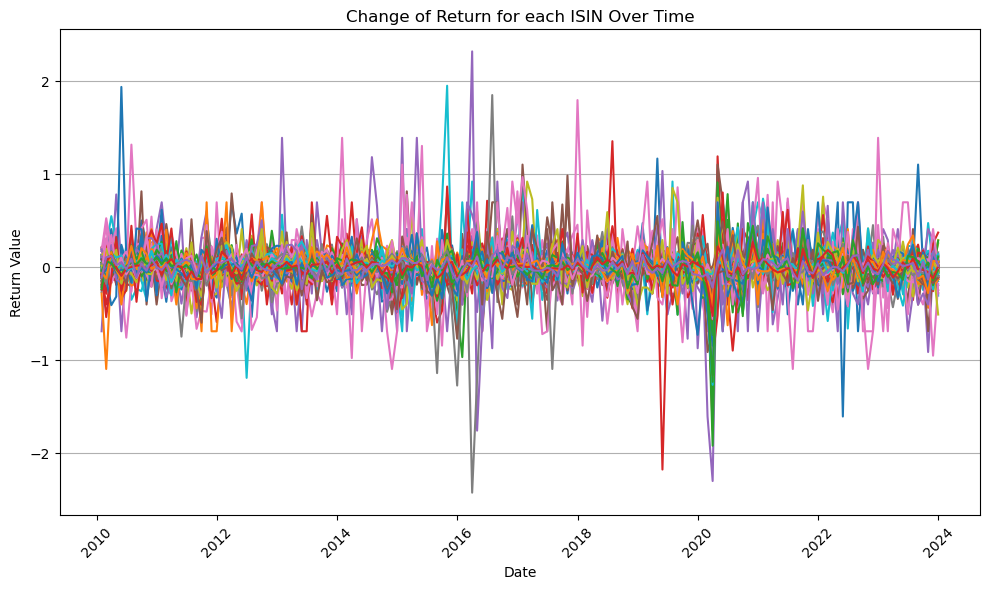

In [68]:
plt.figure(figsize=(10, 6))

# Loop through each company and plot the line manually
for company in df_melted['Company'].unique():
    company_data = df_melted[df_melted['Company'] == company]
    plt.plot(company_data['Date'], company_data['Value'], label=company)

# Customize the plot (optional)
plt.title('Change of Return for each ISIN Over Time')
plt.xlabel('Date')
plt.ylabel('Return Value')
plt.xticks(rotation=45)
# plt.legend(title='Company')
plt.grid(axis='y')
plt.tight_layout()
plt.show()